In [9]:
import pandas_datareader as pdr

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

In [11]:
start=datetime(2015,9,20)
alibaba=pdr.get_data_yahoo('BABA',start=start)
amazon=pdr.get_data_yahoo('AMZN',start=start)

In [14]:
alibaba.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-09-21,65.379997,66.400002,62.959999,63.900002,63.900002,22355100
2015-09-22,62.939999,63.270000,61.580002,61.900002,61.900002,14897900
2015-09-23,61.959999,62.299999,59.680000,60.000000,60.000000,22684600
2015-09-24,59.419998,60.340000,58.209999,59.919998,59.919998,20645700
2015-09-25,60.630001,60.840000,58.919998,59.240002,59.240002,17009100


In [15]:
amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-09-21,544.330017,549.780029,539.590027,548.390015,548.390015,3283300
2015-09-22,539.710022,543.549988,532.659973,538.400024,538.400024,3841700
2015-09-23,538.299988,541.210022,534.000000,536.070007,536.070007,2237600
2015-09-24,530.549988,534.559998,522.869995,533.750000,533.750000,3501000
2015-09-25,542.570007,542.799988,521.400024,524.250000,524.250000,4031000


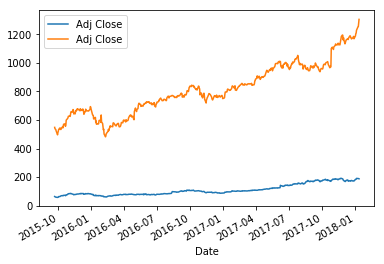

In [17]:
alibaba['Adj Close'].plot()
amazon['Adj Close'].plot()
plt.legend()

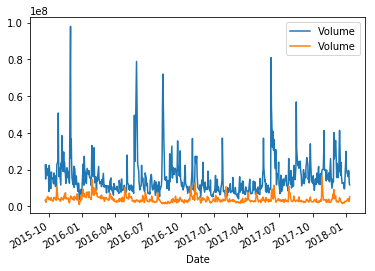

In [19]:
alibaba['Volume'].plot(legend=True)
amazon['Volume'].plot(legend=True)

In [26]:
alibaba['High-Low']=alibaba['High']-alibaba['Low']


In [27]:
amazon['High-Low']=amazon['High']-amazon['Low']

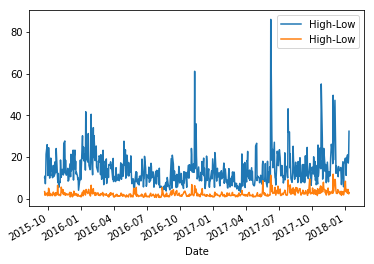

In [34]:
amazon['High-Low'].plot()
alibaba['High-Low'].plot()
plt.legend(loc=0)

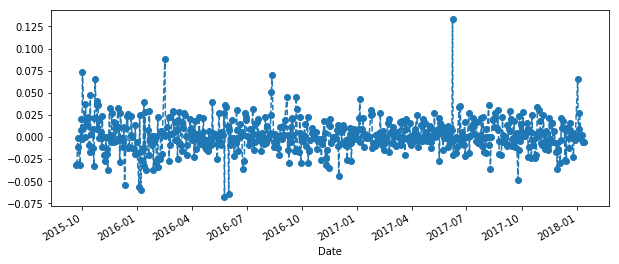

In [43]:
#daily return
alibaba['daily-return']=alibaba['Adj Close'].pct_change()
alibaba['daily-return'].plot(figsize=(10,4),linestyle='--',marker='o')

In [51]:
df=DataFrame([[1,2,3],[4,5,6],[7,8,9]],columns=['A','B','C'])
df


,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [55]:
df['A'].pct_change()#1相对于4来说增加了3倍，  4为1的4倍 百分比变化

0     NaN
1    3.00
2    0.75
Name: A, dtype: float64

In [52]:
np.random.randint(10,size=10).reshape(2,5)

array([[7, 7, 0, 7, 5],
       [5, 9, 7, 4, 5]])

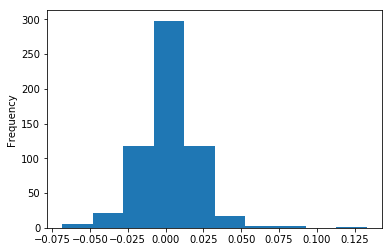

In [57]:
alibaba['daily-return'].plot(kind='hist')

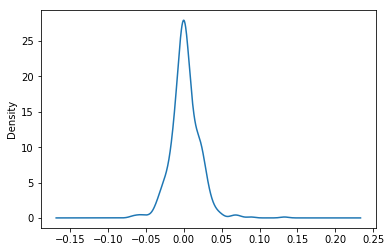

In [58]:
alibaba['daily-return'].plot(kind='kde')

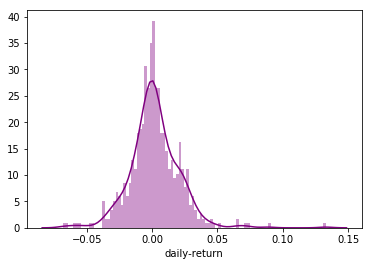

In [60]:
sns.distplot(alibaba['daily-return'].dropna(),bins=100,color='purple')
#dropna() 去掉所有NaN值

# analysis companies relationship

In [71]:
df=pdr.get_data_yahoo('BABA')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,93.889999,271879400
2014-09-22,92.699997,92.949997,89.500000,89.889999,89.889999,66657800
2014-09-23,88.940002,90.480003,86.620003,87.169998,87.169998,39009800
2014-09-24,88.470001,90.570000,87.220001,90.570000,90.570000,32088000
2014-09-25,91.089996,91.500000,88.500000,88.919998,88.919998,28598000


In [86]:
start=datetime(2015,1,1)
company=['AAPL','GOOG','MSFT','AMZN','FB']

In [87]:
top_df=pdr.get_data_yahoo(company,start=start)

In [93]:
type(top_df)
# panel的数据结构是将这个company的list分别归于各个columns标题之下
#             Open         High     Low     Close     Adj Close      Volume
# Date     AAPL AMZN FB   
# 2017     123   23  23
# 2015     232   23  12

pandas.core.frame.DataFrame

In [94]:
top_df=top_df['Adj Close']

KeyError: 'Adj Close'

In [95]:
top_df.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2018-01-12,177.089996,1305.199951,179.369995,1122.260010,89.599998
2018-01-11,175.279999,1276.680054,187.770004,1105.520020,88.080002
2018-01-10,174.289993,1254.329956,187.839996,1102.609985,87.820000
2018-01-09,174.330002,1252.699951,187.869995,1106.260010,88.220001
2018-01-08,174.350006,1246.869995,188.279999,1106.939941,88.279999


In [96]:
top_df_dr=top_df.pct_change()

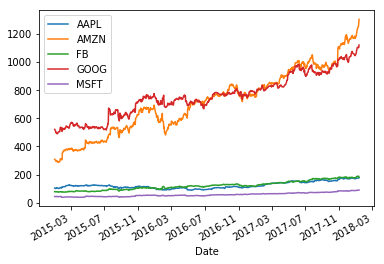

In [97]:
top_df.plot()

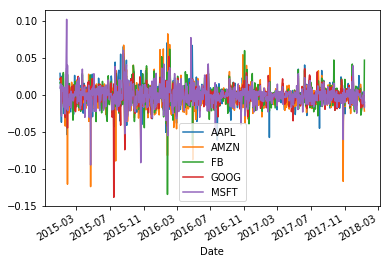

In [98]:
top_df_dr.plot()

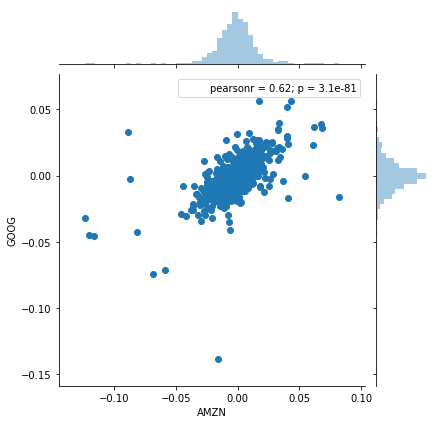

In [99]:
sns.jointplot('AMZN','GOOG',top_df_dr,kind='scatter')

#散点图若x,y都大于零，说明谷歌和亚马逊那天都涨了

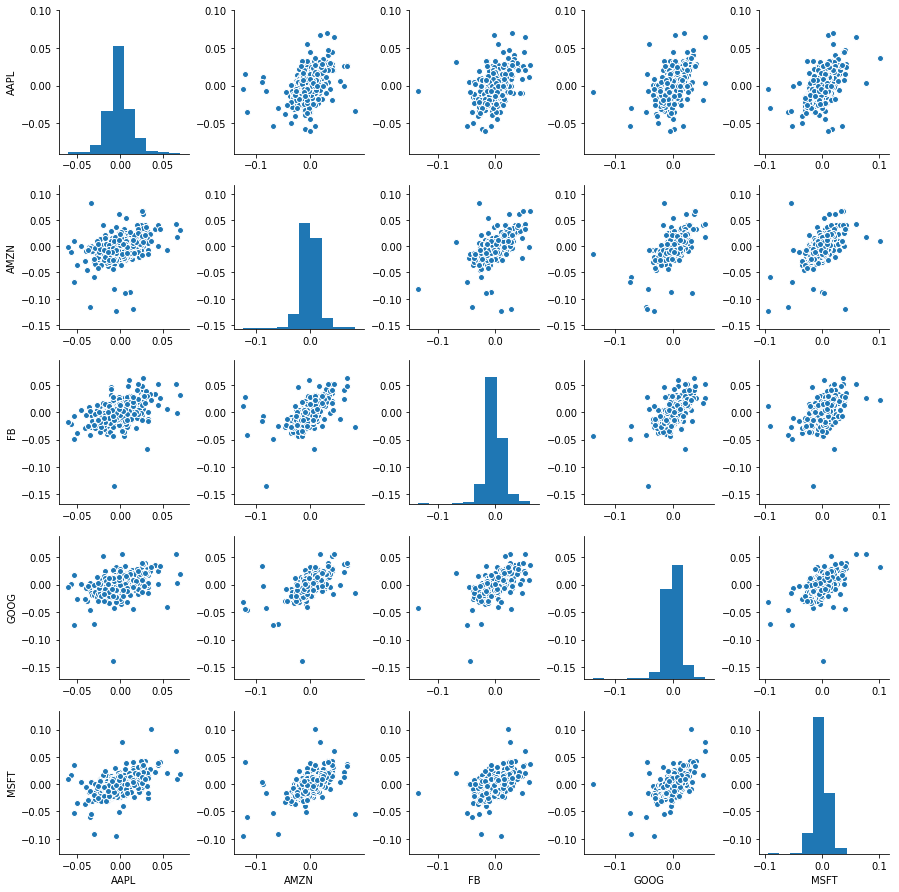

In [100]:
sns.pairplot(top_df_dr.dropna())